In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./Cleaned.csv')


In [2]:
df.columns

Index(['Papers evaluated in this study', 'Paper title', 'Publication venue',
       'Year Published', 'Link', 'Code Available?', 'Public Dataset',
       'Private Dataset', 'Multiple Datasets?',
       'Dataset Distribution included?', 'Sample size for Evaluation ',
       'Hyperparameters Reported?',
       'Method for tuning hyperparameters reported?',
       'Evaluation metric reported (RMSE / MAPE, MAE)',
       'Include all reported prediction horizon (like, future 30, future 60 ...)',
       'Sampling horizon', 'Baseline included?', 'Variance Reported?',
       'other lifestyle factors applied to train model',
       'Best reported result (prediction horizon) 30 is the primary',
       'Best reported metric', 'Best reported prediction horizon',
       'model type ', 'Link.1', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [3]:
# ratio of code available to not

def get_ratio(df, column_name):
    available_count = len(df[df[column_name] == 'Yes'])
    unavailable_count = len(df) - available_count
    ratio = available_count / len(df) if len(df) > 0 else 0
    return ratio


print(f'Ratio of Code Available: {get_ratio(df, "Code Available?")}')
print(f'Ratio of Hyperparameters Reported: {get_ratio(df, "Hyperparameters Reported?")}')
print(f'Ratio of Papers that used Public Datasets:{len(df["Public Dataset"].dropna())/(len(df))}')
print(f'Ratio of Papers that used OhioT1DM:{len(df[df["Public Dataset"] == "OhioT1DM"])/(len(df))}')
print(f'Ratio of Papers that reported 30: {len(df[df["Best reported prediction horizon"] == "30"])/(len(df))}')
# ratio fo parameter

Ratio of Code Available: 0.21666666666666667
Ratio of Hyperparameters Reported: 0.7
Ratio of Papers that used Public Datasets:0.85
Ratio of Papers that used OhioT1DM:0.31666666666666665
Ratio of Papers that reported 30: 0.8


In [4]:
def get_value_frequencies(df, column_name):
    """
    Calculate and display the frequency of each unique value in a specified column of a DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    column_name : str
        The name of the column to analyze.

    Returns
    -------
    pandas.Series
        A Series containing the frequency of each unique value in the column.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    return df[column_name].value_counts()

# Example usage
frequencies = get_value_frequencies(df, "Code Available?")
print(frequencies)
frequencies = get_value_frequencies(df, "Public Dataset")
print(frequencies)
frequencies = get_value_frequencies(df, "Multiple Datasets?")
print(frequencies)
frequencies = get_value_frequencies(df, "Hyperparameters Reported?")
print(frequencies)
frequencies = get_value_frequencies(df, "Method for tuning hyperparameters reported?")
print(frequencies)
frequencies = get_value_frequencies(df, "Best reported prediction horizon")
print(frequencies)

Code Available?
No     47
Yes    13
Name: count, dtype: int64
Public Dataset
OhioT1DM                                                     19
OhioT1DM                                                      7
DirecNet                                                      3
OhioT1DM, ShanghaiT1DM, ShanghaiT2DM                          2
RT-CGM                                                        2
T1DEXI                                                        2
OhioT1DM, DCLP3, DCLP5, RT-CGM                                1
OpenAPS, OhioT1DM                                             1
Tidepool                                                      1
OhioT1DM, ShanghaiT2DM, Physionet                             1
Nationwide Multicenter CGM, National Real-World CGM study     1
ShanghaiT2DM                                                  1
D1NAMO                                                        1
ShanghaiT1DM, ShanghaiT2DM                                    1
Custom Open-Source         

In [5]:
13/60

0.21666666666666667

In [6]:
code_available = 13/60
multiple_ds = 23/60
Hyperp_reported = 43/60
tune_reported = (60-24)/60
reported_30min = 48/60  # Didn't include the paper with other evaluation metrics, such as MAE, MAPE, but also reported their result on 30 min prediction horizon

print(f"code_available = {code_available}")
print(f"multiple_ds = {multiple_ds}")
print(f"Hyperp_reported = {Hyperp_reported}")
print(f"tune_reported = {tune_reported}")
print(f"reported_30min = {reported_30min}")

code_available = 0.21666666666666667
multiple_ds = 0.38333333333333336
Hyperp_reported = 0.7166666666666667
tune_reported = 0.6
reported_30min = 0.8


In [7]:
def count_na(df, column_name):
    """
    Count the number of NaN (missing) values in a specific column of a DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    column_name : str
        The name of the column to inspect.

    Returns
    -------
    int
        The number of NaN values in the column.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    return df[column_name].isna().sum()

# Example usage
na_count = count_na(df, "Public Dataset")
print(f"Number of NaN values in 'Public Dataset': {na_count}")

Number of NaN values in 'Public Dataset': 9


In [8]:
public_ds = (60-9)/60 
print(f"public_ds = {public_ds}")

public_ds = 0.85


In [9]:
def count_rows_with_word(df, column_name, word):
    """
    Count the number of rows in a specific column that include a given word.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    column_name : str
        The name of the column to inspect.
    word : str
        The word to search for in the column.

    Returns
    -------
    int
        The number of rows that include the word.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    return df[column_name].str.contains(word, na=False).sum()

# Example usage
count = count_rows_with_word(df, "Public Dataset", "OhioT1DM")
print(f"Number of rows including the word 'OhioT1DM' in 'Public Dataset': {count}")

Number of rows including the word 'OhioT1DM' in 'Public Dataset': 32


In [10]:
# Example usage
count = count_rows_with_word(df, "Evaluation metric reported (RMSE / MAPE, MAE)", "RMSE")
print(f"Number of rows including the word 'Evaluation metric' in 'Public Dataset': {count}")

Number of rows including the word 'Evaluation metric' in 'Public Dataset': 56


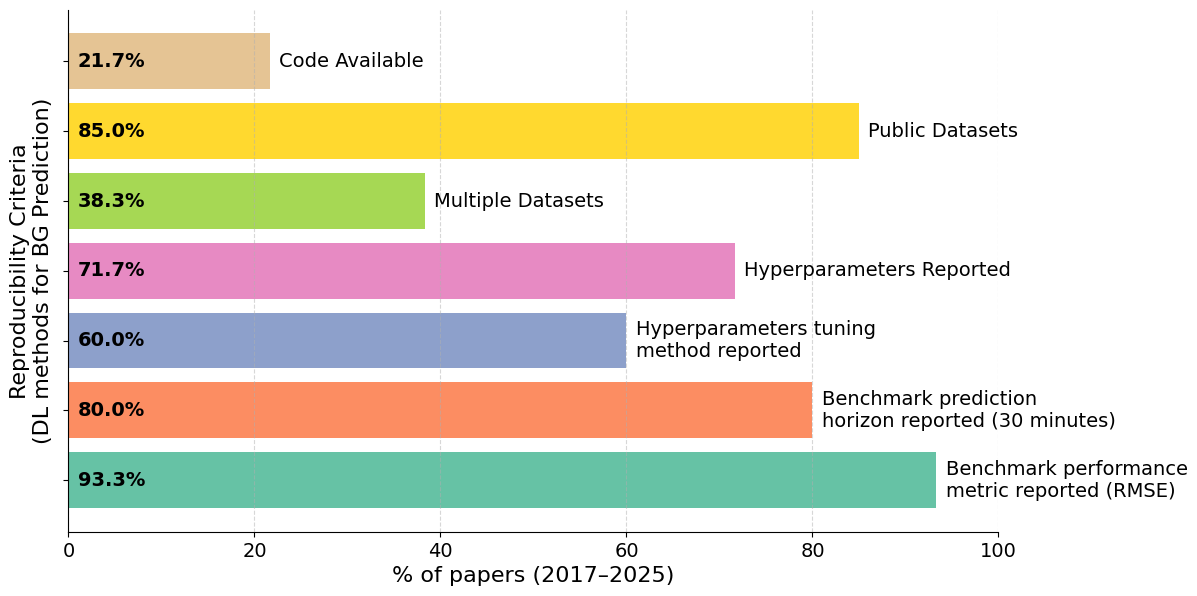

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_ratios(ratios):
    # Reverse order for top-to-bottom display
    metrics = list(ratios.keys())[::-1]
    values = list(ratios.values())[::-1]

    # Color palette from Set2
    cmap = plt.get_cmap("Set2")
    colors = [cmap(i) for i in range(len(metrics))]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(range(len(metrics)), values, color=colors, edgecolor="none")

    # Set y-axis positions but remove default labels
    ax.set_yticks(range(len(metrics)))
    ax.set_yticklabels(["" for _ in metrics])
    ax.set_ylabel("Reproducibility Criteria\n(DL methods for BG Prediction)", fontsize=16)

    # Add text: % on the left, label on the right
    for i, (val, label) in enumerate(zip(values, metrics)):
        ax.text(1, i, f"{val:.1f}%", va='center', ha='left', fontsize=14, fontweight='bold')
        ax.text(val + 1, i, label, va='center', ha='left', fontsize=14)

    # Keep only bottom and left axis lines (spines)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)

    # Styling
    ax.set_xlim(0, 100)
    ax.set_xlabel("% of papers (2017–2025)", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Tighten layout and remove padding around edges
    plt.subplots_adjust(left=0.05, right=0.98, top=0.92, bottom=0.05)
    plt.show()
    


# Example usage
ratios = {
        "Code Available": code_available * 100,
        "Public Datasets": public_ds * 100,
        "Multiple Datasets": multiple_ds * 100,
        "Hyperparameters Reported": Hyperp_reported * 100,
        "Hyperparameters tuning\nmethod reported": tune_reported * 100,
        "Benchmark prediction\nhorizon reported (30 minutes)": reported_30min * 100,
        "Benchmark performance\nmetric reported (RMSE)": 56/60 * 100,
    }
plot_ratios(ratios)

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def calculate_distribution(df, column_name, bins, labels):
    """
    Calculate the distribution of values in a column based on specified bins.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    column_name : str
        The name of the column to analyze.
    bins : list
        The bin edges for categorizing the values.
    labels : list
        The labels for each bin.

    Returns
    -------
    pd.Series
        A Series containing the count of values in each bin.
    """
    # Filter rows where "Best reported metric" equals 30
    filtered_df = df[df["Best reported prediction horizon"] == "30"]

    # Categorize values into bins
    distribution = pd.cut(filtered_df[column_name], bins=bins, labels=labels, right=False).value_counts(sort=False)
    return distribution

def plot_distribution(distribution):
    """
    Plot a horizontal bar plot for the given distribution and annotate percentages.

    Parameters
    ----------
    distribution : pd.Series
        A Series containing the count of values in each bin.
    """
    # Calculate percentages
    total = distribution.sum()
    percentages = (distribution / total) * 100

    # Create the horizontal bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(distribution.index.astype(str), distribution.values, color="skyblue")

    # Annotate percentages on the bars
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                 f"{percentage:.1f}%", va="center", fontsize=10)

    plt.xlabel("Count")
    plt.title("Distribution of 'Best reported metric' (Interval = 5)")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Define bins and labels for the intervals
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30"]

# Example usage
# distribution = calculate_distribution(df, "Best reported metric", bins, labels)
# plot_distribution(distribution)

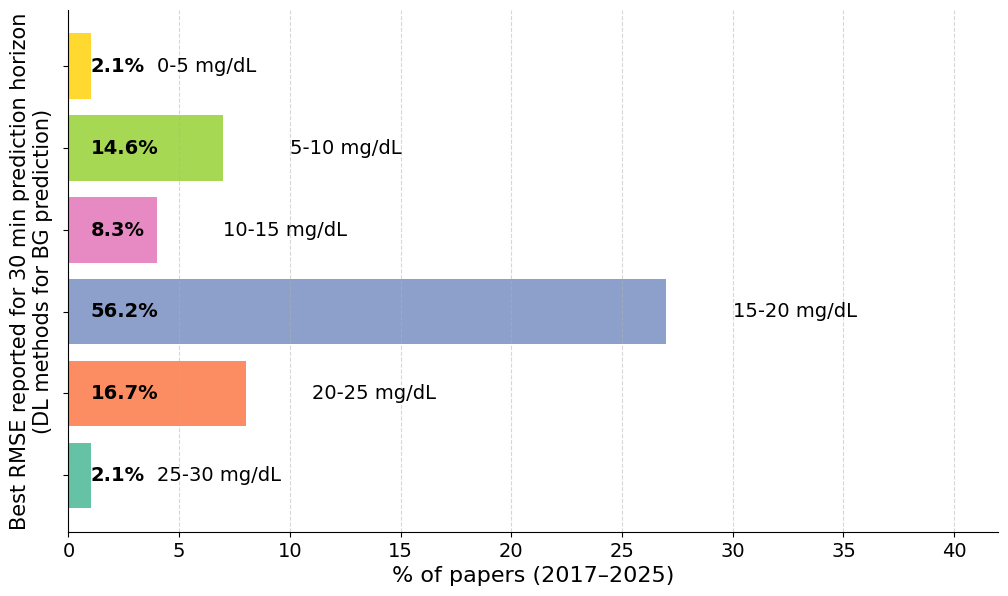

In [15]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ["0-5 mg/dL", "5-10 mg/dL", "10-15 mg/dL", "15-20 mg/dL", "20-25 mg/dL", "25-30 mg/dL"]

def plot_distribution_formatted(distribution):
    """
    Plot a horizontal bar plot for the given distribution with a specific format.

    Parameters
    ----------
    distribution : pd.Series
        A Series containing the count of values in each bin.
    """
    # Reverse order for top-to-bottom display
    bins = distribution.index.astype(str)[::-1]
    counts = distribution.values[::-1]

    # Calculate percentages
    total = distribution.sum()
    percentages = (distribution / total * 100)[::-1]

    # Color palette from Set2
    cmap = plt.get_cmap("Set2")
    colors = [cmap(i) for i in range(len(bins))]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(range(len(bins)), counts, color=colors, edgecolor="none")

    # Set y-axis positions but remove default labels
    ax.set_yticks(range(len(bins)))
    ax.set_yticklabels(["" for _ in bins])
    ax.set_ylabel("Best RMSE reported for 30 min prediction horizon\n(DL methods for BG prediction)", fontsize=15)

    # Add text: % on the left, label on the right with spacing
    for i, (count, percentage, label) in enumerate(zip(counts, percentages, bins)):
        ax.text(1, i, f"{percentage:.1f}%", va='center', ha='left', fontsize=14, fontweight='bold')
        ax.text(count + 3, i, label, va='center', ha='left', fontsize=14)  # Add spacing to avoid overlap

    # Keep only bottom and left axis lines (spines)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)

    # Styling
    ax.set_xlim(0, max(counts) + 15)  # Adjust x-axis limit for spacing
    ax.set_xlabel("% of papers (2017–2025)", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Tighten layout and remove padding around edges
    plt.subplots_adjust(left=0.05, right=0.98, top=0.92, bottom=0.05)
    plt.show()

# Example usage
distribution = calculate_distribution(df, "Best reported metric", bins, labels)
plot_distribution_formatted(distribution)

In [ ]:
distribution

Best reported metric
0-5 mg/dL       1
5-10 mg/dL      7
10-15 mg/dL     4
15-20 mg/dL    27
20-25 mg/dL     8
25-30 mg/dL     1
Name: count, dtype: int64

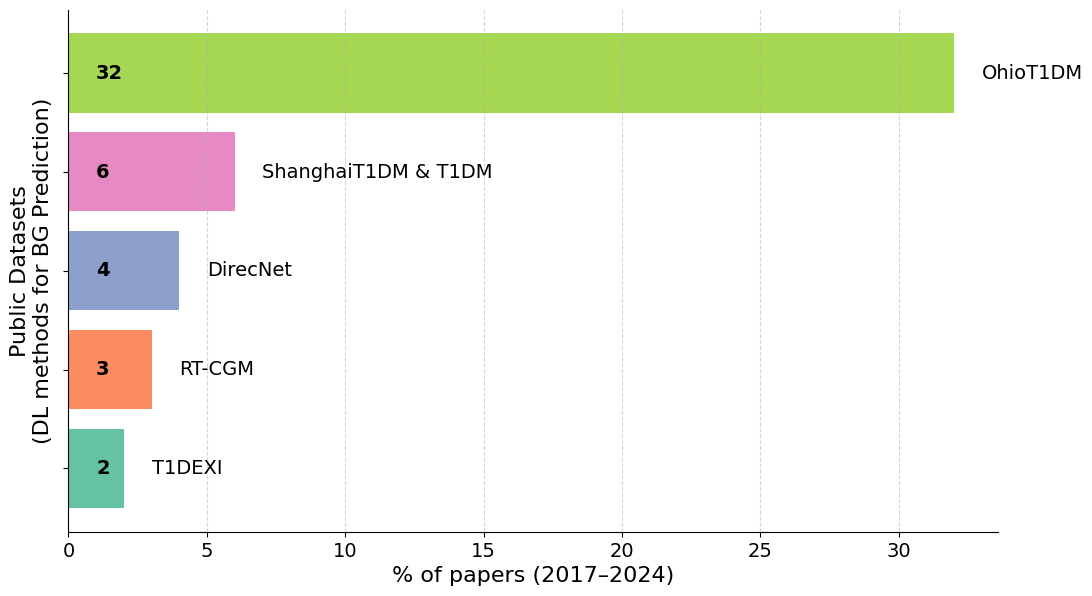

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_ds_ratios(ratios):
    # Reverse order for top-to-bottom display
    metrics = list(ratios.keys())[::-1]
    values = list(ratios.values())[::-1]

    # Color palette from Set2
    cmap = plt.get_cmap("Set2")
    colors = [cmap(i) for i in range(len(metrics))]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(range(len(metrics)), values, color=colors, edgecolor="none")

    # Set y-axis positions but remove default labels
    ax.set_yticks(range(len(metrics)))
    ax.set_yticklabels(["" for _ in metrics])
    ax.set_ylabel("Public Datasets\n(DL methods for BG Prediction)", fontsize=16)

    # Add text: % on the left, label on the right
    for i, (val, label) in enumerate(zip(values, metrics)):
        ax.text(1, i, f"{val}", va='center', ha='left', fontsize=14, fontweight='bold')
        ax.text(val + 1, i, label, va='center', ha='left', fontsize=14)

    # Keep only bottom and left axis lines (spines)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)

    # Styling
    # ax.set_xlim(0, 100)
    ax.set_xlabel("% of papers (2017–2024)", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Tighten layout and remove padding around edges
    plt.subplots_adjust(left=0.05, right=0.98, top=0.92, bottom=0.05)
    plt.show()
    


# Example usage
ds_ratios = {
        "OhioT1DM": 32,
        "ShanghaiT1DM & T1DM": 6,
        "DirecNet": 4,
        "RT-CGM": 3,
        "T1DEXI": 2,
    }
plot_ds_ratios(ds_ratios)

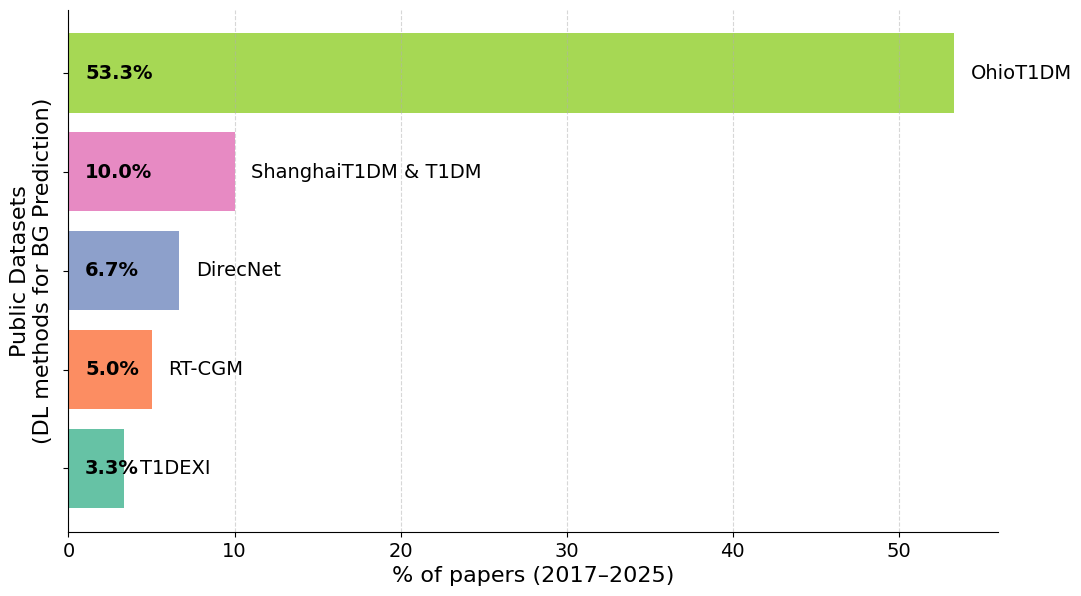

In [16]:
# Example usage
def plot_ratios(ratios):
    # Reverse order for top-to-bottom display
    metrics = list(ratios.keys())[::-1]
    values = list(ratios.values())[::-1]

    # Color palette from Set2
    cmap = plt.get_cmap("Set2")
    colors = [cmap(i) for i in range(len(metrics))]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(range(len(metrics)), values, color=colors, edgecolor="none")

    # Set y-axis positions but remove default labels
    ax.set_yticks(range(len(metrics)))
    ax.set_yticklabels(["" for _ in metrics])
    ax.set_ylabel("Public Datasets\n(DL methods for BG Prediction)", fontsize=16)

    # Add text: % on the left, label on the right
    for i, (val, label) in enumerate(zip(values, metrics)):
        ax.text(1, i, f"{val:.1f}%", va='center', ha='left', fontsize=14, fontweight='bold')
        ax.text(val + 1, i, label, va='center', ha='left', fontsize=14)

    # Keep only bottom and left axis lines (spines)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)

    # Styling
    # ax.set_xlim(0, 100)
    ax.set_xlabel("% of papers (2017–2025)", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Tighten layout and remove padding around edges
    plt.subplots_adjust(left=0.05, right=0.98, top=0.92, bottom=0.05)
    plt.show()
    
ds_ratios = {
        "OhioT1DM": 32/60 * 100,
        "ShanghaiT1DM & T1DM": 6/60 * 100,
        "DirecNet": 4/60 * 100,
        "RT-CGM": 3/60* 100,
        "T1DEXI": 2/60* 100,
    }
plot_ratios(ds_ratios)

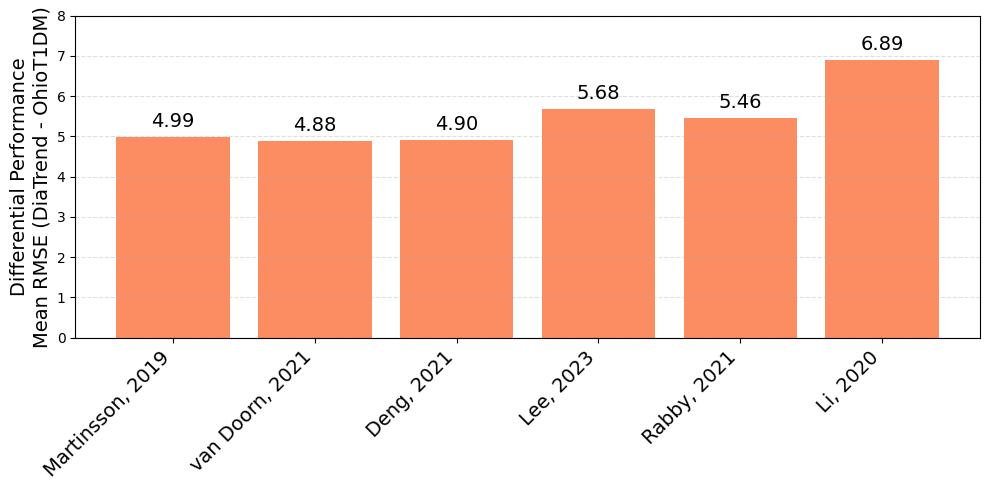

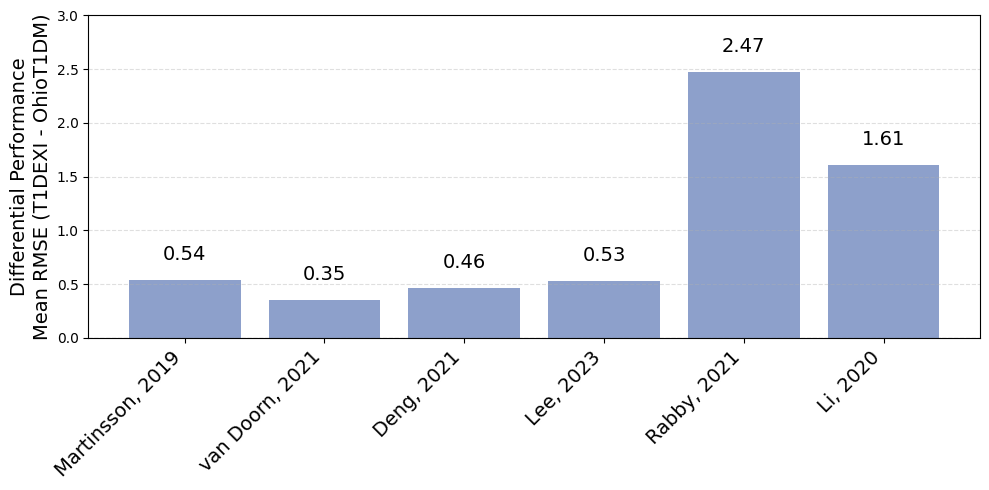

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Data from LaTeX table
methods = [
    "Martinsson, 2019", "van Doorn, 2021", "Deng, 2021",
    "Lee, 2023", "Rabby, 2021", "Li, 2020"
]

ohio_means = [18.86, 19.20, 19.34, 19.78, 19.78, 19.31]
diatrend_means = [23.85, 24.08, 24.24, 25.46, 25.24, 26.20]
t1dexi_means = [19.40, 19.55, 19.80, 20.31, 22.25, 20.92]

# Differences
diff_diatrend = [d - o for d, o in zip(diatrend_means, ohio_means)]
diff_t1dexi = [t - o for t, o in zip(t1dexi_means, ohio_means)]

# Plotting function
def plot_rmse_diff(methods, differences, title, bar_color, bound):
    plt.figure(figsize=(10, 5))
    x = np.arange(len(methods))
    bars = plt.bar(x, differences, color=bar_color)

    # Annotate each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        offset = 0.15 if height >= 0 else -0.3
        plt.text(bar.get_x() + bar.get_width()/2, height + offset,
                 f"{height:.2f}", ha='center', va='bottom' if height >= 0 else 'top', fontsize=14)

    plt.xticks(x, methods, rotation=45, ha='right', fontsize=14)
    plt.ylim(0, bound)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.ylabel(title, fontsize=14)
    # plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# Plot 1: DiaTrend - OhioT1DM

# Use Set2 colors
colors = plt.get_cmap("Set2").colors
color_diatrend = colors[1]  # second color
color_t1dexi = colors[2]   

# Plot 1: DiaTrend - OhioT1DM
plot_rmse_diff(methods, diff_diatrend, "Differential Performance\nMean RMSE (DiaTrend - OhioT1DM)", color_diatrend, bound = 8)

# Plot 2: T1DEXI - OhioT1DM
plot_rmse_diff(methods, diff_t1dexi, "Differential Performance\nMean RMSE (T1DEXI - OhioT1DM)", color_t1dexi, bound = 3)

